# DETR : How to load a dataset

This tutorial aims to introduce you to the datasets format you can use to train or finetune a model on DETR.

    - 1. Dataset pipeline and outputs
    - 2. Coco Dataset
    - 3. Voc Dataset
    - 4. Tensorflow csv Dataset

<img src="../images/datasetsupport.png"></img>


## 1. Dataset pipeline and outputs

Any implemented dataset on this repository run the following pipeline

- **Dataset specific** loading: The first step is specific to a dataset. This repository provides method to load dataset that follow the coco, voc or Tensorflow csv format. If you want to support an other format you can considere to implement your own pipeline following our tutorial (DETR Tensorflow - How to setup a custom dataset.ipynb) or post a feature request on the github. 

- **DETR transformations/augmentations**: the provided methods apply the transformations and augmentations needed on your data
- **Image normalization**: The pipeline will also normalizations your image before to call return the final data
- **Tensorflow Dataset**: Once the dataset is ready, the method setup a Tensorflow Dataset and return an iterator that can be used to train or finetune DETR.

<img src="../images/tutorials/data-pipeline.png"></img>


The datasets outputs:
    
- **images** of shape (batch_size, height, width, 3) where height and width are constant defined in your training config.
- **target bbox** (batch_size, 100, 4). All target bbox are padded to fixed size and comes up with an header to keep track of the number of real bbox. This is usefull later on during the training on Tensorflow. Note that this header is temporary and should be remove in upcoming versions by ragged tensors
- **target class** (batch, size, 100, 1) The class id of each bbox. Like the bbox, the target class are padded for training purposes.


## Coco Dataset

If you're dataset follow the Coco Dataset format, then detr_tf provide you with a method to automatically load your dataset. Any coco dataset is made of at least one image's directory and one json annotation file following the coco instance json format.

### Training config for a coco dataset


In [2]:
import sys
# Set the path to detr_tf
sys.path.append("../")

from detr_tf.data import load_coco_dataset
from detr_tf.training_config import TrainingConfig, DataConfig

class MyConfig(TrainingConfig):
    def __init__(self):
        super().__init__()        
        self.data_dir = "/path/to/coco_format/dataset"
        self.data = DataConfig(data_dir=self.data_dir, img_dir="val2017", ann_file="annotations/instances_val2017.json")
        self.batch_size = 1

config = MyConfig()
iterator, class_names = load_coco_dataset(config, config.batch_size, augmentation=True)

loading annotations into memory...
Done (t=0.41s)
creating index...
index created!


The dataset returns an iterator that you can use to train your model along with the list of class in the dataset expand with the background class.

### Plot the data

images.shape (1, 376, 672, 3)
target_bbox.shape (1, 100, 4)
target_class.shape (1, 100, 1)


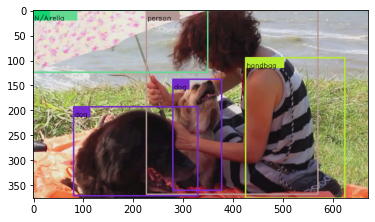

In [3]:
from detr_tf.inference import numpy_bbox_to_image
import numpy as np
import matplotlib.pyplot as plt

for images, target_bbox, target_class in iterator:
    print("images.shape", images.shape)
    print("target_bbox.shape", target_bbox.shape)
    print("target_class.shape", target_class.shape)

    # Plot image
    image = numpy_bbox_to_image(
        np.array(images[0]),
        np.array(target_bbox[0]),
        labels=np.array(target_class[0]),
        scores=None,
        class_name=class_names,
        config=config
    )
    plt.imshow(image)
    break

## Voc Dataset

If you're dataset follow the Voc Dataset format, then detr_tf provide you with a method to automaticly load your dataset. A voc dataset is at least made of one image folder and one xml folder (XMLs and Images can be stored in the same directory)

### ### Training config for a VOC dataset

In [6]:
import sys
# Set the path to detr_tf
sys.path.append("../")

from detr_tf.data import load_voc_dataset
from detr_tf.training_config import TrainingConfig, DataConfig

class MyConfig(TrainingConfig):
    def __init__(self):
        super().__init__()
        self.data_dir = "/path/to/voc_dataset/"
        self.data = DataConfig(data_dir=self.data_dir, img_dir="JPEGImages", ann_dir="Annotations")
        self.batch_size = 1

config = MyConfig()
iterator, class_names = load_voc_dataset(config, config.batch_size, augmentation=True)

The dataset returns an iterator that you can use to train your model along with the list of class in the dataset expand with the background class.

### Plot the data

images.shape (1, 376, 672, 3)
target_bbox.shape (1, 100, 4)
target_class.shape (1, 100, 1)


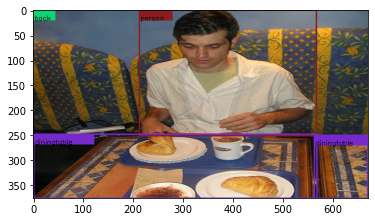

In [7]:
from detr_tf.inference import numpy_bbox_to_image
import numpy as np
import matplotlib.pyplot as plt

for images, target_bbox, target_class in iterator:
    print("images.shape", images.shape)
    print("target_bbox.shape", target_bbox.shape)
    print("target_class.shape", target_class.shape)

    # Plot image
    image = numpy_bbox_to_image(
        np.array(images[0]),
        np.array(target_bbox[0]),
        labels=np.array(target_class[0]),
        scores=None,
        class_name=class_names,
        config=config
    )
    plt.imshow(image)
    break

## Tensorflow csv Dataset

If you're dataset follow the Tensorflow csv format, then detr_tf provide you with a method to automatically load your dataset. Any tfcsv dataset is made of at least one image's directory and one csv annotation file following the tensorflow csv format object detection format.
 


### Training config for a Tensorflow csv Dataset

In [2]:
import sys
# Set the path to detr_tf
sys.path.append("../")

from detr_tf.data import load_tfcsv_dataset
from detr_tf.training_config import TrainingConfig, DataConfig

class MyConfig(TrainingConfig):
    def __init__(self):
        super().__init__()
        self.data_dir = "/home/falcon2212/college/sem8/PE/detr-tensorflow/data/maskwearing"
        self.data = DataConfig(data_dir=self.data_dir, img_dir="test", ann_file="test/_annotations.csv")
        self.batch_size = 1

config = MyConfig()
iterator, class_names = load_tfcsv_dataset(config, config.batch_size, augmentation=True)

The dataset returns an iterator that you can use to train your model along with the list of class in the dataset expand with the background class.

### Plot the data

images.shape (1, 376, 672, 3)
target_bbox.shape (1, 100, 4)
target_class.shape (1, 100, 1)


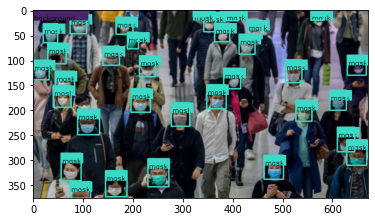

In [3]:
from detr_tf.inference import numpy_bbox_to_image
import numpy as np
import matplotlib.pyplot as plt

for images, target_bbox, target_class in iterator:
    print("images.shape", images.shape)
    print("target_bbox.shape", target_bbox.shape)
    print("target_class.shape", target_class.shape)

    # Plot image
    image = numpy_bbox_to_image(
        np.array(images[0]),
        np.array(target_bbox[0]),
        labels=np.array(target_class[0]),
        scores=None,
        class_name=class_names,
        config=config
    )
    plt.imshow(image)
    break